Encryption
After initial permutation 13A0D17F18CD18AA
Round  1   18CD18AA   77212880   395CC072DC8C
Round  2   77212880   6A412473   4538580ABCCE
Round  3   6A412473   0DB5739C   5061FC4835BB
Round  4   0DB5739C   A0B3F6A2   06ECF4ACF5B1
Round  5   A0B3F6A2   A48BD736   94C515AF7829
Round  6   A48BD736   C5465B2A   DE6D022B4E63
Round  7   C5465B2A   62193817   470B27625B72
Round  8   62193817   C216B141   6AA729DEC912
Round  9   C216B141   53975BBA   ABB0A595893E
Round  10   53975BBA   097FDFD7   C9940F85475C
Round  11   097FDFD7   58E7BB3F   9906EAC51ED0
Round  12   58E7BB3F   568BB959   618ADAD9B2C0
Round  13   568BB959   3D5F3ADB   F052B859A27D
Round  14   3D5F3ADB   3BA96B65   34F8A2F0C62D
Round  15   3BA96B65   DA57CB67   949B4433DC8C
Round  16   197004F7   DA57CB67   B22D521A3E8E
Cipher Text :  6BAB27C8F113BB89
Encryption
After initial permutation 13A0D17F18CD18AA
Round  1   18CD18AA   77202980   3954C072DC8C
Round  2   77202980   D90130FA   4538580ABCCE
Round  3   D90130FA   261

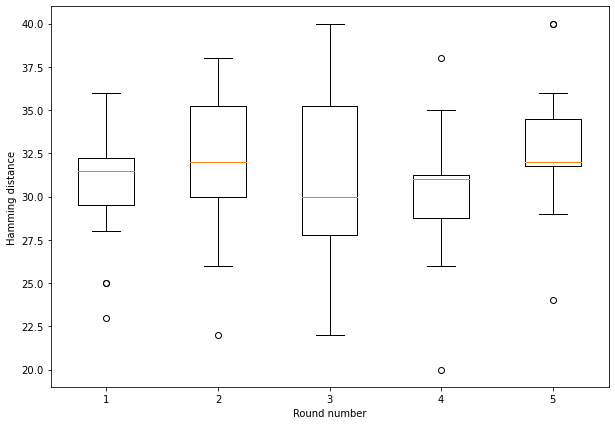

In [8]:
import matplotlib.pyplot as plt
import numpy as np
bdata=[]
# Hexadecimal to binary conversion
def hex2bin(s):
    mp = {'0' : "0000",
          '1' : "0001",
          '2' : "0010",
          '3' : "0011",
          '4' : "0100",
          '5' : "0101",
          '6' : "0110",
          '7' : "0111",
          '8' : "1000",
          '9' : "1001",
          'A' : "1010",
          'B' : "1011",
          'C' : "1100",
          'D' : "1101",
          'E' : "1110",
          'F' : "1111" }
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin
# Binary to hexadecimal conversion
def bin2hex(s):
    mp = {"0000" : '0',
          "0001" : '1',
          "0010" : '2',
          "0011" : '3',
          "0100" : '4',
          "0101" : '5',
          "0110" : '6',
          "0111" : '7',
          "1000" : '8',
          "1001" : '9',
          "1010" : 'A',
          "1011" : 'B',
          "1100" : 'C',
          "1101" : 'D',
          "1110" : 'E',
          "1111" : 'F' }
    hex = ""
    for i in range(0,len(s),4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]
    return hex
# Binary to decimal conversion
def bin2dec(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal
# Decimal to binary conversion
def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res)%4 != 0):
        div = len(res) / 4
        div = int(div)
        counter =(4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res
# Permute function to rearrange the bits
def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation
# shifting the bits towards left by nth shifts
def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1,len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
        return k
# calculating xow of two strings of binary number a and b
def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans
# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]
# Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
         6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
         12, 13, 12, 13, 14, 15, 16, 17,
         16, 17, 18, 19, 20, 21, 20, 21,
         22, 23, 24, 25, 24, 25, 26, 27,
         28, 29, 28, 29, 30, 31, 32, 1 ]
# Straight Permutation Table
per = [ 16, 7, 20, 21,
        29, 12, 28, 17,
        1, 15, 23, 26,
        5, 18, 31, 10,
        2, 8, 24, 14,
        32, 27, 3, 9,
        19, 13, 30, 6,
        22, 11, 4, 25 ]
# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
        [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],
       [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],
       [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],
       [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
        [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
        [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
        [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],
       [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],
       [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
        [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
        [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],
       [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],
       [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
        [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
        [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
        [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]
# Final Permutation Table
final_perm = [ 40, 8, 48, 16, 56, 24, 64, 32,
                39, 7, 47, 15, 55, 23, 63, 31,
                38, 6, 46, 14, 54, 22, 62, 30,
                37, 5, 45, 13, 53, 21, 61, 29,
                36, 4, 44, 12, 52, 20, 60, 28,
                35, 3, 43, 11, 51, 19, 59, 27,
                34, 2, 42, 10, 50, 18, 58, 26,
                33, 1, 41, 9, 49, 17, 57, 25 ]
def encrypt(pt, rkb, rk):
    pt = hex2bin(pt)
    data=[]
    opt=pt
    # Initial Permutation
    pt = permute(pt, initial_perm, 64)
    print("After initial permutation", bin2hex(pt))
    # Splitting
    left = pt[0:32]
    right = pt[32:64]
    for i in range(0, 16):
        # Expansion D-box: Expanding the 32 bits data into 48 bits
        right_expanded = permute(right, exp_d, 48)
        # XOR RoundKey[i] and right_expanded
        xor_x = xor(right_expanded, rkb[i])
        # S-boxex: substituting the value from s-box table by calculating row and column
        sbox_str = ""
        for j in range(0, 8):
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)
        # Straight D-box: After substituting rearranging the bits
        sbox_str = permute(sbox_str, per, 32)
        # XOR left and sbox_str
        result = xor(left, sbox_str)
        left = result
        # Swapper
        if(i != 15):
            left, right = right, left
        temp=left+right
        hd=0
        for x in range(len(opt)):
            if(opt[x]!=temp[x]):
                hd+=1
        data.append(hd)
        print("Round ", i + 1, " ", bin2hex(left), " ", bin2hex(right), " ", rk[i])
    # Combination
    combine = left + right
    # Final permutation: final rearranging of bits to get cipher text
    cipher_text = permute(combine, final_perm, 64)
    bdata.append(data)
    return cipher_text
#uncomment for single key and single plaintext
'''pt = "123456ABCD132536"
key = "AABB09182736CCDD"
key = hex2bin(key)
key = permute(key, keyp, 56)'''
#Generate plaintext with Hamming Distance from 1-5 for 5 different initial plaintext
#Comment out if want constant plaintext
pt = "123456ABCD132536"
newpt=hex2bin(pt);
plaintext1=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newpt:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    plaintext1.append(bin2hex(plain))
plaintext1.append(pt)

pt2 = "654321ABCD132536"
newpt=hex2bin(pt2);
plaintext2=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newpt:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    plaintext2.append(bin2hex(plain))
plaintext2.append(pt2)

pt3 = "123456DCBA132536"
newpt=hex2bin(pt3);
plaintext3=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newpt:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    plaintext3.append(bin2hex(plain))
plaintext3.append(pt3)

pt4 = "123456ABCD152336"
newpt=hex2bin(pt4);
plaintext4=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newpt:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    plaintext4.append(bin2hex(plain))
plaintext4.append(pt4)

pt5 = "123456ABCD132536"
newpt=hex2bin(pt5);
plaintext5=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newpt:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    plaintext5.append(bin2hex(plain))
plaintext5.append(pt5)

#Generate secretkey with Hamming Distance from 1-5 for 5 different initial secretkey
#Comment out if want constant secretkey

key = "AABB09182736CCDD"
newk=hex2bin(key);
secretkey1=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newk:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    secretkey1.append(bin2hex(plain))
secretkey1.append(key)

key = "AABB09182736DDCC"
newk=hex2bin(key);
secretkey2=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newk:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    secretkey2.append(bin2hex(plain))
secretkey2.append(key)

key = "AABB81902736CCDD"
newk=hex2bin(key);
secretkey3=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newk:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    secretkey3.append(bin2hex(plain))
secretkey3.append(key)

key = "BBAA09182736CCDD"
newk=hex2bin(key);
secretkey4=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newk:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    secretkey4.append(bin2hex(plain))
secretkey4.append(key)

key = "AABB09186372CCDD"
newk=hex2bin(key);
secretkey5=[]
for h in range(1,5):
    k=0
    plain=""
    for c in newk:
        if k<h and c=='1':
            plain+='0'
            k+=1
        else:
            plain+=c
    secretkey5.append(bin2hex(plain))
secretkey5.append(key)

# Key generation
# --hex to binary
#key = hex2bin(key)

# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4 ]
# getting 56 bit key from 64 bit using the parity bits
#key = permute(key, keyp, 56)
# Number of bit shifts
# Number of bit shifts
shift_table = [1, 1, 2, 2,
                2, 2, 2, 2,
                1, 2, 2, 2,
                2, 2, 2, 1 ]
# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
            3, 28, 15, 6, 21, 10,
            23, 19, 12, 4, 26, 8,
            16, 7, 27, 20, 13, 2,
            41, 52, 31, 37, 47, 55,
            30, 40, 51, 45, 33, 48,
            44, 49, 39, 56, 34, 53,
            46, 42, 50, 36, 29, 32 ]
# Splitting

#Uncomment for single secretkey
'''left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
    # Shifting the bits by nth shifts by checking from shift table
    left = shift_left(left, shift_table[i])
    right = shift_left(right, shift_table[i])
    
    # Combination of left and right string
    combine_str = left + right
    
    # Compression of key from 56 to 48 bits
    round_key = permute(combine_str, key_comp, 48)
    
    rkb.append(round_key)
    rk.append(bin2hex(round_key))'''
#comment out if want to see results for different plaintext 
#change name for secretkey1, secretkey2 etc as per requirement

for k in secretkey5:
    k=hex2bin(k)
    k= permute(k, keyp, 56)
    left = k[0:28]
    right=k[28:56]
    rkb=[]
    rk=[]
    for i in range(0,16):
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])
        combine_str = left + right
        round_key = permute(combine_str, key_comp, 48)
        rkb.append(round_key)
        rk.append(bin2hex(round_key))
    print("Encryption")
    cipher_text = bin2hex(encrypt(pt2, rkb, rk))
    print("Cipher Text : ",cipher_text)
#uncomment if want to see results for different plaintext 
#change name for plaintext1, plaintext2 etc as per requirement
'''for s in plaintext5:
    print("Encryption")
    cipher_text = bin2hex(encrypt(s, rkb, rk))
    print("Cipher Text : ",cipher_text)'''
#uncomment for single plaintext single key encryption and decryption
'''print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ",cipher_text)

print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ",text)'''

#Plot Box and Whisker plots
fig=plt.figure(figsize=(10,7))
plt.boxplot(bdata)
#plt.title(title)
plt.ylabel('Hamming distance')
plt.xlabel('Round number')
plt.show()